In [37]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
import pandas_profiling
from pandas_profiling.utils.cache import cache_file
%matplotlib inline

In [18]:
#Import worldwide Covid vaccination records and check data types
# Data source: https://www.kaggle.com/yamqwe/covid-19-vaccinationse
df = pd.read_csv('vaccinations.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80014 entries, 0 to 80013
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   index                                80014 non-null  int64  
 1   location                             80014 non-null  object 
 2   iso_code                             80014 non-null  object 
 3   date                                 80014 non-null  object 
 4   total_vaccinations                   44200 non-null  float64
 5   people_vaccinated                    42185 non-null  float64
 6   people_fully_vaccinated              39434 non-null  float64
 7   total_boosters                       15521 non-null  float64
 8   daily_vaccinations_raw               36983 non-null  float64
 9   daily_vaccinations                   79677 non-null  float64
 10  total_vaccinations_per_hundred       44200 non-null  float64
 11  people_vaccinated_per_hundre

In [19]:
#inspect the data schema
df.head()

,index,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
2,2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
3,3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003
4,4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,34.0,1367.0,0.003


In [20]:
# Select columns for EDA
df1 = df[['location','iso_code','date','daily_vaccinations','daily_vaccinations_per_million', 'daily_people_vaccinated','daily_people_vaccinated_per_hundred']]

In [21]:
# Check for null values
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80014 entries, 0 to 80013
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   location                             80014 non-null  object 
 1   iso_code                             80014 non-null  object 
 2   date                                 80014 non-null  object 
 3   daily_vaccinations                   79677 non-null  float64
 4   daily_vaccinations_per_million       79677 non-null  float64
 5   daily_people_vaccinated              78512 non-null  float64
 6   daily_people_vaccinated_per_hundred  78512 non-null  float64
dtypes: float64(4), object(3)
memory usage: 4.3+ MB


In [22]:
vac_sum = df1.groupby(by=['location'])[['daily_vaccinations_per_million','daily_people_vaccinated_per_hundred','daily_vaccinations', 'daily_people_vaccinated']].sum()
vac_sum.sort_values(by=['daily_people_vaccinated_per_hundred'], ascending=False)

,daily_vaccinations_per_million,daily_people_vaccinated_per_hundred,daily_vaccinations,daily_people_vaccinated
location,,,,
Gibraltar,3374731.0,130.440,113698.0,43936.0
Bhutan,2156173.0,109.596,1681601.0,854771.0
Cuba,2903469.0,95.358,32860027.0,10792073.0
Portugal,2143717.0,94.507,21797146.0,9609030.0
Brunei,2208084.0,92.559,974941.0,408656.0
...,...,...,...,...
Chad,22692.0,1.474,384000.0,250373.0
Haiti,17793.0,1.128,205304.0,130188.0
Democratic Republic of Congo,4851.0,0.368,447301.0,360550.0


In [31]:
df2 = df.dropna(subset=['total_vaccinations', 'people_vaccinated','people_fully_vaccinated']).drop(['index','total_boosters', 'daily_vaccinations_raw','total_boosters_per_hundred',], axis=1)
df2

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
78,Afghanistan,AFG,2021-05-11,504502.0,448878.0,55624.0,13921.0,1.27,1.13,0.14,349.0,10994.0,0.028
87,Afghanistan,AFG,2021-05-20,547901.0,470341.0,77560.0,4822.0,1.38,1.18,0.19,121.0,2385.0,0.006
91,Afghanistan,AFG,2021-05-24,573277.0,476367.0,96910.0,5692.0,1.44,1.20,0.24,143.0,1883.0,0.005
93,Afghanistan,AFG,2021-05-26,590454.0,479372.0,111082.0,6768.0,1.48,1.20,0.28,170.0,1631.0,0.004
94,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,6487.0,1.49,1.20,0.29,163.0,1319.0,0.003
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80009,Zimbabwe,ZWE,2022-02-01,7578422.0,4274653.0,3303769.0,7550.0,50.21,28.32,21.89,500.0,3725.0,0.025
80010,Zimbabwe,ZWE,2022-02-02,7593924.0,4282687.0,3311237.0,8608.0,50.32,28.38,21.94,570.0,4290.0,0.028
80011,Zimbabwe,ZWE,2022-02-03,7600946.0,4286198.0,3314748.0,8296.0,50.36,28.40,21.96,550.0,4160.0,0.028
80012,Zimbabwe,ZWE,2022-02-04,7611929.0,4292012.0,3319917.0,8188.0,50.44,28.44,22.00,543.0,4094.0,0.027


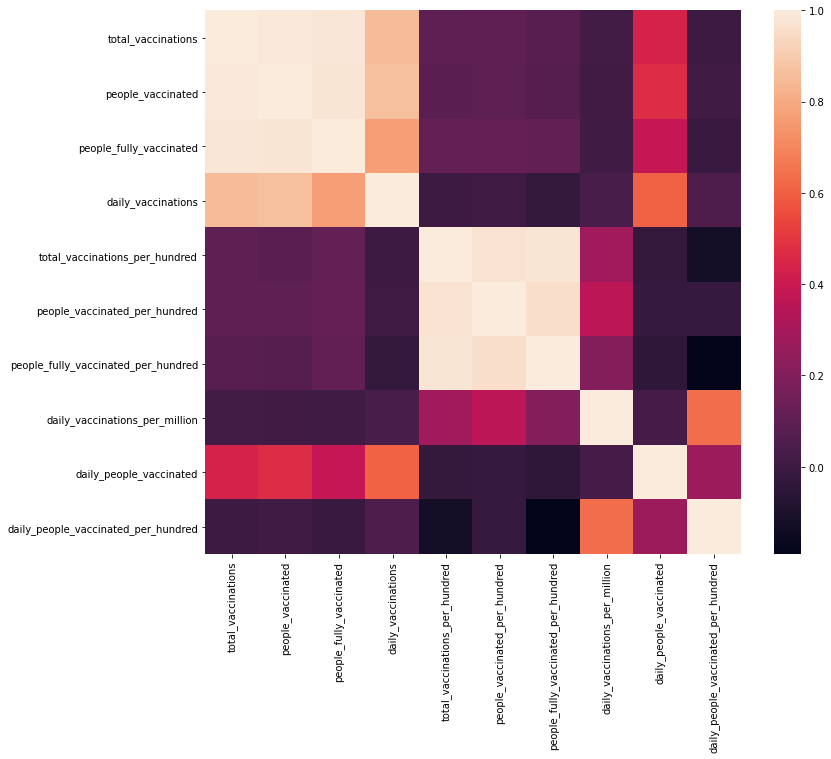

In [32]:
plt.subplots(figsize=(12,10))
sns.heatmap(df2.corr());

In [ ]:
# Relationship between people_fully_vaccinated_per_hundred and date, grouped by location
sns.relplot(x='date', y='people_fully_vaccinated_per_hundred', data=df2, hue='location', palette="muted", alpha=0.5, height=10, aspect=8/5)
plt.margins(0.02)
plt.xlabel('Date')
plt.ylabel('People Fully Vaccinated per hundred')
plt.title('People Fully Vaccinated per hundred by Location')
#plt.savefig("vac.png", bbox_inches = 'tight')
plt.show()

In [ ]:
sns.pairplot(df)
plt.show()